In [0]:
! pip install -q kaggle

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 ! kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16           4034  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16           5275  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           3MB  2019-08-21 14:51:34           1848  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          2MB  2019-07-05 09:58:02           3189  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactio

In [7]:
!kaggle competitions download -c severstal-steel-defect-detection

 72% 5.00M/6.91M [00:00<00:00, 36.1MB/s]
100% 6.91M/6.91M [00:00<00:00, 44.2MB/s]
  0% 0.00/141k [00:00<?, ?B/s]
100% 141k/141k [00:00<00:00, 134MB/s]
 99% 1.15G/1.16G [00:12<00:00, 99.1MB/s]
100% 1.16G/1.16G [00:12<00:00, 100MB/s] 
 88% 113M/129M [00:01<00:00, 89.7MB/s] 
100% 129M/129M [00:01<00:00, 111MB/s] 


In [0]:
!unzip -q "/content/train.csv.zip"

In [0]:
! mkdir '/content/train_images'

In [0]:
! mkdir '/content/test_images'

In [11]:
import pandas as pd
import os
import numpy as np
import shutil
shutil.move("/content/train_images.zip","/content/train_images/train_images.zip")

'/content/train_images/train_images.zip'

In [12]:
shutil.move("/content/test_images.zip","/content/test_images/test_images.zip")

'/content/test_images/test_images.zip'

In [0]:
!unzip -q train_images/train_images.zip  -d train_images/

In [0]:
!unzip -q test_images/test_images.zip  -d test_images/

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
train_df = pd.read_csv('train.csv')
train_df.head()

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


In [17]:
image_id=[]
cate=[]
for i in range(len(train_df["ImageId_ClassId"])):
  lis = train_df["ImageId_ClassId"][i].split("_")
  print(lis[0])
  image_id.append(lis[0])
  cate.append(lis[1])

train_df["image_id"]=image_id
train_df["category"]=cate

0002cc93b.jpg
0002cc93b.jpg
0002cc93b.jpg
0002cc93b.jpg
00031f466.jpg
00031f466.jpg
00031f466.jpg
00031f466.jpg
000418bfc.jpg
000418bfc.jpg
000418bfc.jpg
000418bfc.jpg
000789191.jpg
000789191.jpg
000789191.jpg
000789191.jpg
0007a71bf.jpg
0007a71bf.jpg
0007a71bf.jpg
0007a71bf.jpg
000a4bcdd.jpg
000a4bcdd.jpg
000a4bcdd.jpg
000a4bcdd.jpg
000f6bf48.jpg
000f6bf48.jpg
000f6bf48.jpg
000f6bf48.jpg
0014fce06.jpg
0014fce06.jpg
0014fce06.jpg
0014fce06.jpg
001982b08.jpg
001982b08.jpg
001982b08.jpg
001982b08.jpg
001d1b355.jpg
001d1b355.jpg
001d1b355.jpg
001d1b355.jpg
001d3d093.jpg
001d3d093.jpg
001d3d093.jpg
001d3d093.jpg
0025bde0c.jpg
0025bde0c.jpg
0025bde0c.jpg
0025bde0c.jpg
002af848d.jpg
002af848d.jpg
002af848d.jpg
002af848d.jpg
002e73b3c.jpg
002e73b3c.jpg
002e73b3c.jpg
002e73b3c.jpg
002fc4e19.jpg
002fc4e19.jpg
002fc4e19.jpg
002fc4e19.jpg
0030401a5.jpg
0030401a5.jpg
0030401a5.jpg
0030401a5.jpg
003ac9d2a.jpg
003ac9d2a.jpg
003ac9d2a.jpg
003ac9d2a.jpg
0046839bd.jpg
0046839bd.jpg
0046839bd.jpg
004683

In [0]:
train_df.drop("ImageId_ClassId" , axis = 1,inplace = True)

In [19]:
55

55

In [20]:
len(train_df["image_id"].unique())

12568

In [21]:
train_df.head()

,EncodedPixels,image_id,category
0,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1
1,NaN,0002cc93b.jpg,2
2,NaN,0002cc93b.jpg,3
3,NaN,0002cc93b.jpg,4
4,NaN,00031f466.jpg,1


In [0]:
def rle2mask(rle, imgshape):
    width = imgshape[0]
    height= imgshape[1]
    
    mask= np.zeros( width*height ).astype(np.uint8)
    
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])] = 1
        current_position += lengths[index]
        
    return np.flipud( np.rot90( mask.reshape(height, width), k=1 ) )

In [0]:
!pip install tensorflow-gpu==1.14

     |████████████████████████████████| 377.0MB 76kB/s 
     |████████████████████████████████| 491kB 37.0MB/s 
     |████████████████████████████████| 3.2MB 17.2MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.14.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.14.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import tensorflow as tf
import tensorflow
tensorflow.compat.v2.keras.backend.set_image_data_format("channels_last")

In [24]:
train_df["image_id"][0]

'0002cc93b.jpg'

In [0]:
import cv2

In [0]:
img = cv2.imread("/content/train_images/"+train_df["image_id"][1],0)

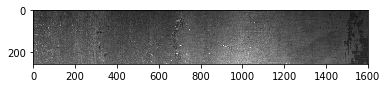

In [0]:
plt.imshow(img,cmap = 'gray')

In [0]:
 defect =rle2mask(train_df['EncodedPixels'].iloc[0])

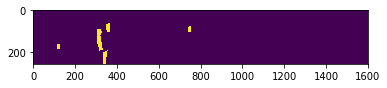

In [0]:
plt.imshow(defect)

In [25]:
!pip install git+https://github.com/karolzak/keras-unet

  Cloning https://github.com/karolzak/keras-unet to /tmp/pip-req-build-p2akz8lx
  Running command git clone -q https://github.com/karolzak/keras-unet /tmp/pip-req-build-p2akz8lx
  Created wheel for keras-unet: filename=keras_unet-0.0.7-cp36-none-any.whl size=11848 sha256=c389eb1660b231f2fb81420177cf474cd3c546c4a84c318dbdeae1c88d471592
  Stored in directory: /tmp/pip-ephem-wheel-cache-72i4xr2u/wheels/b3/3a/85/c3df1c96b5d83dcd2c09b634e72a98cafcf12a52501ac5cd77
Successfully built keras-unet


In [26]:
!pip install keras

In [0]:
lis = np.unique(train_df["image_id"])

In [0]:
df = pd.DataFrame(columns= ['image_id','1','2','3','4','pixel'])

In [0]:
df['image_id'] = lis

In [0]:


for i in range(len(train_df)):
  cat = train_df["category"][i]
  encP = train_df["EncodedPixels"][i]

  if encP is np.nan:
    continue
  else:
    
    df[str(cat)][i]  = encP
    df['pixel'][i] = encP

In [31]:
df_train = df[df['pixel'].notnull()].reset_index(drop=True)
print(len(df_train))
df_train.head()

1710


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,image_id,1,2,3,4,pixel
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,005b92582.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...
2,005da33cf.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,007f28bba.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0088260da.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,229501 11 229741 33 229981 55 230221 77 230468...


In [26]:
from keras_unet.models import custom_unet

model = custom_unet(
    input_shape=(256, 256, 3),
    use_batch_norm=False,
    num_classes=4,
    filters=64,
    dropout=0.2,
    output_activation='sigmoid')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Using TensorFlow backend.


In [0]:
#Model
import keras
from keras.layers.convolutional import Conv2DTranspose
from keras.layers.merge import concatenate
from keras.layers import UpSampling2D, Conv2D, Activation, Input, Dropout, MaxPooling2D
from keras import Model
from keras import backend as K
from keras.layers.core import Lambda

inputs = Input((256, 256, 3))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
from keras_unet.models import vanilla_unet

model = vanilla_unet(input_shape=(512, 512, 3))

In [0]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [0]:
import cv2

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = 256
def keras_generator(batch_size):
    while True:
        x_batch = []
        y_batch = []
        ran = np.random.choice(len(df_train), batch_size, replace=False)
#         ran = np.arange(len())
        for i in range(batch_size):
            
            fn = df_train['image_id'][ran[i]]
            img = cv2.imread( './train_images/'+str(fn) )
           
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      
            
            mask = rle2mask(df_train['pixel'].iloc[ran[i]], img.shape)
            
            img = cv2.resize(img, (img_size, img_size))
            mask = cv2.resize(mask, (img_size, img_size))
            
            x_batch += [img]
            y_batch += [mask]
                                    
        x_batch = np.array(x_batch)
        y_batch = np.array(y_batch)

        yield x_batch, np.expand_dims(y_batch, -1)

In [38]:
for x, y in keras_generator(4):
    break
    
print(x.shape, y.shape)

(4, 256, 256, 3) (4, 256, 256, 1)


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics = ["accuracy",dice_coef])

In [50]:
batch_size = 16
results = model.fit_generator(keras_generator(batch_size), 
                              steps_per_epoch=100,
                              epochs=10) 

Epoch 1/10
100/100 [==============================] - 36s 356ms/step - loss: 0.2218 - acc: 0.9418 - dice_coef: 0.0582
Epoch 2/10
100/100 [==============================] - 35s 353ms/step - loss: 0.2101 - acc: 0.9459 - dice_coef: 0.0547
Epoch 3/10
100/100 [==============================] - 35s 352ms/step - loss: 0.2178 - acc: 0.9430 - dice_coef: 0.0577
Epoch 4/10
100/100 [==============================] - 35s 352ms/step - loss: 0.2088 - acc: 0.9462 - dice_coef: 0.0539
Epoch 5/10
100/100 [==============================] - 35s 353ms/step - loss: 0.2081 - acc: 0.9467 - dice_coef: 0.0534
Epoch 6/10
100/100 [==============================] - 35s 352ms/step - loss: 0.2114 - acc: 0.9454 - dice_coef: 0.0541
Epoch 7/10
100/100 [==============================] - 35s 352ms/step - loss: 0.2094 - acc: 0.9461 - dice_coef: 0.0542
Epoch 8/10
100/100 [==============================] - 35s 351ms/step - loss: 0.2046 - acc: 0.9477 - dice_coef: 0.0531
Epoch 9/10
100/100 [==============================] - 35

In [0]:
y11  = keras_generator(3)

TypeError: ignored

In [0]:
model.save('m1.h5')

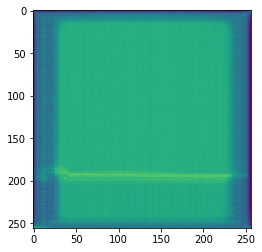

In [51]:
pred = model.predict(x)
plt.imshow(np.squeeze(pred[3]))

In [52]:
pred.shape

(4, 256, 256, 1)

In [0]:
pred = pd.read_csv('pred.csv')

In [0]:
pred = pred.drop([pred.columns[0]],axis=1)

In [76]:
pred

,image_id,0,1,2,3,4
0,5a7c94126.jpg,0.900892,0.005649,0.007254,0.077440,0.008764
1,b461a25f2.jpg,0.871712,0.012398,0.010900,0.092334,0.012656
2,d6128fbfc.jpg,0.892545,0.007022,0.008337,0.082111,0.009985
3,8aff1bbfa.jpg,0.894033,0.006701,0.008091,0.081465,0.009709
4,7f7901508.jpg,0.887308,0.008041,0.008999,0.084914,0.010737
5,95fbc4b8e.jpg,0.871473,0.012446,0.010921,0.092479,0.012681
6,24e1f2523.jpg,0.887394,0.008060,0.008972,0.084913,0.010661
7,971cb01d4.jpg,0.890886,0.007341,0.008567,0.082945,0.010261
8,44d86ff71.jpg,0.874730,0.011469,0.010549,0.091030,0.012222
9,9b66b8330.jpg,0.888881,0.007572,0.008674,0.084494,0.010379


In [0]:
nan_cat = []
pix_cat = []
for i in range(len(pred)):
  if pred['0'][i]>0.5:
     nan_cat.append(pred['image_id'][i])
  else:
    pix_cat.append(pred['image_id'][i])

In [74]:
nan_cat

['5a7c94126.jpg',
 'b461a25f2.jpg',
 'd6128fbfc.jpg',
 '8aff1bbfa.jpg',
 '7f7901508.jpg',
 '95fbc4b8e.jpg',
 '24e1f2523.jpg',
 '971cb01d4.jpg',
 '44d86ff71.jpg',
 '9b66b8330.jpg',
 'dd9364137.jpg',
 '7a8e0ed7a.jpg',
 'c224552e0.jpg',
 '9ebdc1f1f.jpg',
 '53660ffd5.jpg',
 '2523fef1b.jpg',
 '0d495e517.jpg',
 'c0473efc0.jpg',
 '236244295.jpg',
 '8f502dacc.jpg',
 '8dbbdcb59.jpg',
 '25c5fe53a.jpg',
 'c43fd3530.jpg',
 '7a50a0a16.jpg',
 'f27c44348.jpg',
 'c37e5676c.jpg',
 '8e0f84b88.jpg',
 '9d6d2feec.jpg',
 '48994af29.jpg',
 '2e1014fb7.jpg',
 '46d2424e8.jpg',
 'f246790fc.jpg',
 '3ecd7753b.jpg',
 '4e0891122.jpg',
 'b237f89b2.jpg',
 'b1f404feb.jpg',
 '433ecc86d.jpg',
 '243bdc490.jpg',
 '3f9314e1d.jpg',
 '26a2f9809.jpg',
 '1b2f07f66.jpg',
 '5b1e65973.jpg',
 '1fee22ffe.jpg',
 'abbd41d07.jpg',
 '948f0cad1.jpg',
 '782c9966e.jpg',
 '5f0696eb5.jpg',
 'bed6dfbaa.jpg',
 '9d81c8973.jpg',
 '225028fc0.jpg',
 '3228d8997.jpg',
 '9a9703e3c.jpg',
 'c41bc1046.jpg',
 '1d70478fc.jpg',
 '3cfa60f2d.jpg',
 '3eed82d4

In [75]:
pix_cat

[]

In [78]:
import os

os.remove('./test_images/test_images.zip')
testfiles=os.listdir("./test_images/")
len(testfiles)

1801

In [0]:
from tqdm import tqdm_notebook
import cv2

In [80]:
%%time
test_img = []
img_size = 256
c=0
for fn in tqdm_notebook(testfiles):
  img = cv2.imread( './test_images/'+fn,1)
#   print(img.shape)
  try:
    img = cv2.resize(img.astype('uint8'),(img_size,img_size))
  except:
    print(fn)
    
    #   print(img.shape)
  c+=1
  test_img.append(img)


CPU times: user 8.75 s, sys: 296 ms, total: 9.04 s
Wall time: 9.18 s


In [81]:
%%time
predict = model.predict(np.asarray(test_img))
print(len(predict))

1801
CPU times: user 8.97 s, sys: 5.29 s, total: 14.3 s
Wall time: 13.9 s


In [0]:
def mask2rle(img):
    tmp = np.rot90( np.flipud( img ), k=3 )
    rle = []
    lastColor = 0;
    startpos = 0
    endpos = 0

    tmp = tmp.reshape(-1,1)   
    for i in range( len(tmp) ):
        if (lastColor==0) and tmp[i]>0:
            startpos = i
            lastColor = 1
        elif (lastColor==1)and(tmp[i]==0):
            endpos = i-1
            lastColor = 0
            rle.append( str(startpos)+' '+str(endpos-startpos+1) )
    return " ".join(rle)

In [0]:
pred_rle = []
for img in predict:      
    img = cv2.resize(img, (1600, 256))
    tmp = np.copy(img)
    tmp[tmp<np.mean(img)] = 0
    tmp[tmp>0] = 1
    pred_rle.append(mask2rle(tmp))

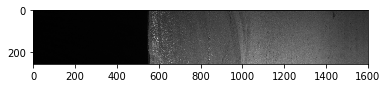

In [85]:
img_t = cv2.imread( './test_images/'+ testfiles[4])
plt.imshow(img_t)

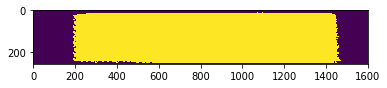

In [86]:
mask_t = rle2mask(pred_rle[4], img.shape)
plt.imshow(mask_t)

In [88]:
%%time
sub = pd.read_csv( './sample_submission.csv' )

for fn, rle in zip(testfiles, pred_rle):
    sub['EncodedPixels'][sub['ImageId_ClassId'].apply(lambda x: x.split('_')[0]) == fn] = rle

CPU times: user 10.8 s, sys: 257 ms, total: 11.1 s
Wall time: 11 s


In [0]:
sub.to_csv('submission.csv', index=False)

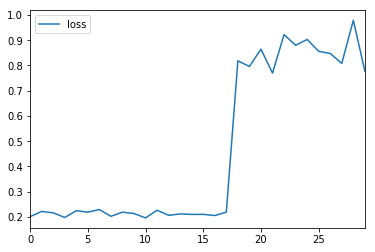

In [102]:
import json
with open('results.json', 'w') as f:
    json.dump(results.history, f)

history_df = pd.DataFrame(results.history)
history_df[['loss']].plot()